In [1]:
import pandas as pd
import numpy
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk

Download the dataset

In [2]:
#install the kaggle api so that we can import the data directly
!pip install kaggle

In [3]:
from google.colab import files
files.upload()  #kaggle.json file

#set the permissions
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [4]:
!kaggle datasets download -d jp797498e/twitter-entity-sentiment-analysis
!unzip twitter-entity-sentiment-analysis.zip


Dataset URL: https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis
License(s): CC0-1.0
  0% 0.00/1.99M [00:00<?, ?B/s]
100% 1.99M/1.99M [00:00<00:00, 45.0MB/s]
Archive:  twitter-entity-sentiment-analysis.zip
  inflating: twitter_training.csv    
  inflating: twitter_validation.csv  


In [5]:
#load and preview the data

train_data = pd.read_csv('twitter_training.csv')
val_data = pd.read_csv('twitter_validation.csv')



train_data.head()


,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [6]:
val_data.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [7]:
#define the column names
column_names = ['ID', 'Entity', 'Sentiment', 'Tweet_Text']

df = pd.read_csv('twitter_training.csv', names=column_names, header=None)

#save the DataFrame back to CSV with the column names
df.to_csv('twitter_training_final.csv', index=False)

train_data = pd.read_csv('twitter_training_final.csv')

train_data.head()


,ID,Entity,Sentiment,Tweet_Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [8]:
#do the same for the validation data
df = pd.read_csv('twitter_validation.csv', names=column_names, header=None)


df.to_csv('twitter_validation_final.csv', index=False)

val_data = pd.read_csv('twitter_validation_final.csv')

val_data.head()

,ID,Entity,Sentiment,Tweet_Text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


Group and Normalize the Data

In [16]:
sentiment_counts = df.groupby(['Entity', 'Sentiment']).size().unstack(fill_value=0)
sentiment_distribution = sentiment_counts.div(sentiment_counts.sum(axis=1), axis=0)
print(sentiment_distribution)


Sentiment                          Irrelevant  Negative   Neutral  Positive
Entity                                                                     
Amazon                               0.088235  0.176471  0.529412  0.205882
ApexLegends                          0.083333  0.166667  0.472222  0.277778
AssassinsCreed                       0.030303  0.121212  0.121212  0.727273
Battlefield                          0.461538  0.269231  0.153846  0.115385
Borderlands                          0.060606  0.151515  0.363636  0.424242
CS-GO                                0.250000  0.062500  0.406250  0.281250
CallOfDuty                           0.354839  0.258065  0.225806  0.161290
CallOfDutyBlackopsColdWar            0.296296  0.111111  0.222222  0.370370
Cyberpunk2077                        0.266667  0.033333  0.133333  0.566667
Dota2                                0.037037  0.296296  0.407407  0.259259
FIFA                                 0.263158  0.421053  0.105263  0.210526
Facebook    

Visualize

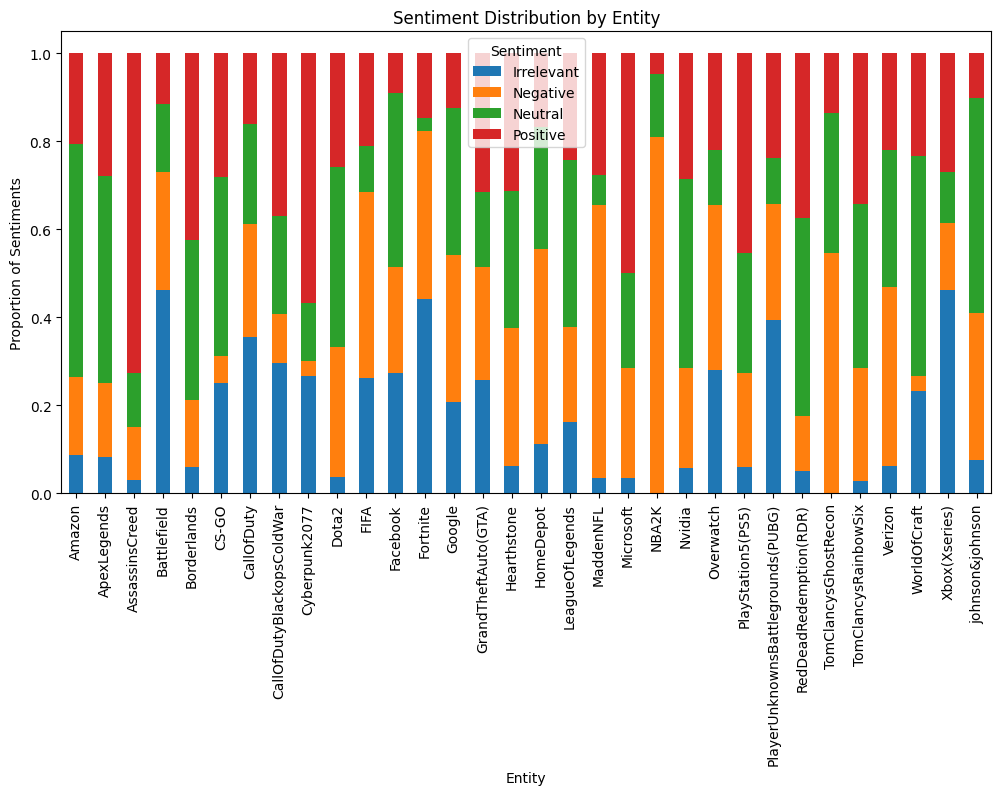

In [10]:
import matplotlib.pyplot as plt

sentiment_distribution.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Sentiment Distribution by Entity')
plt.xlabel('Entity')
plt.ylabel('Proportion of Sentiments')
plt.xticks(rotation=90)
plt.legend(title='Sentiment')
plt.show()


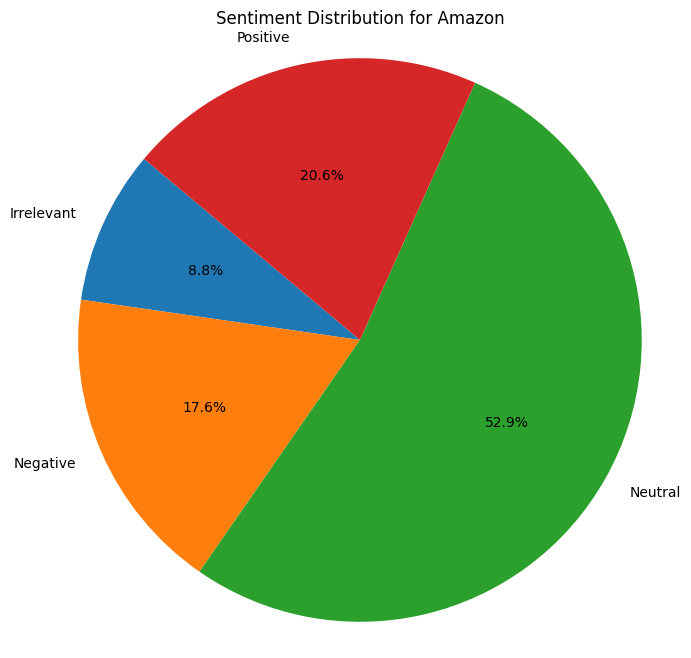

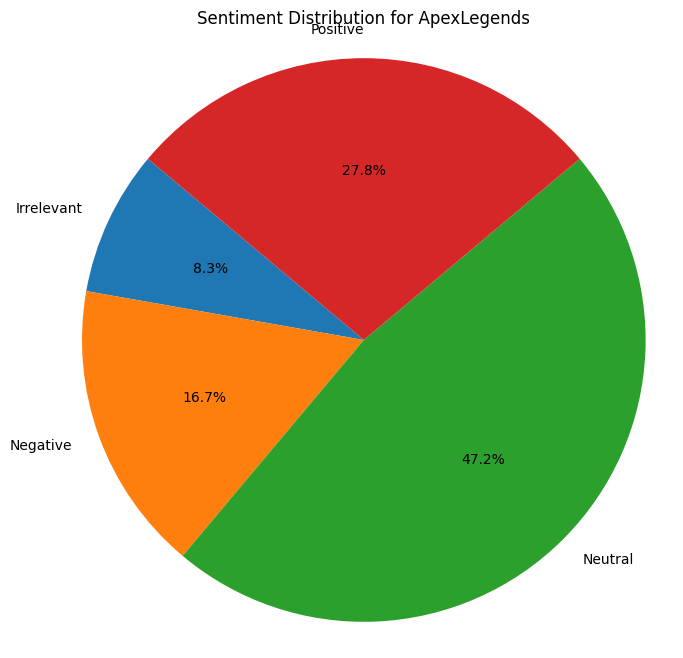

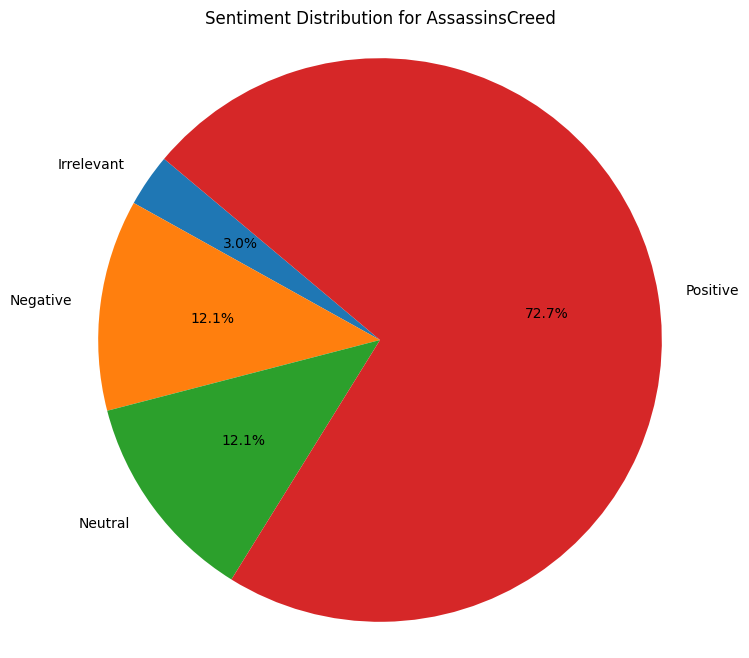

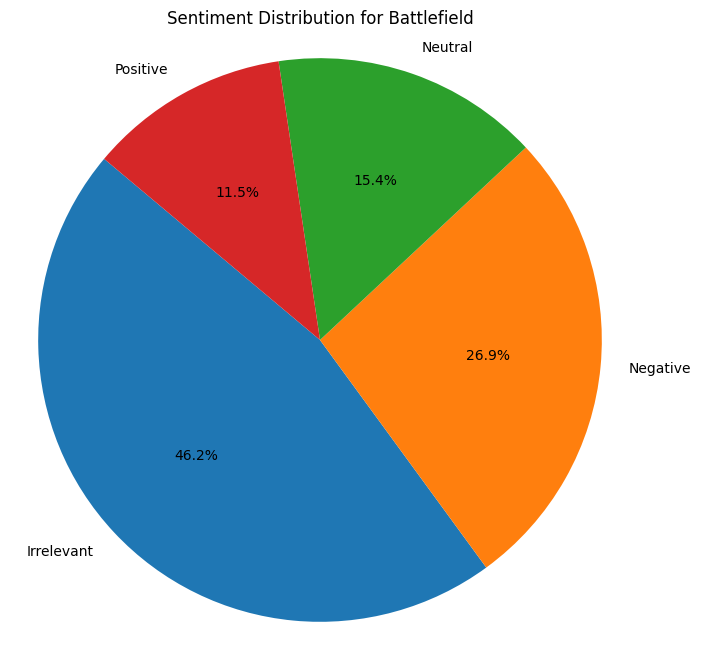

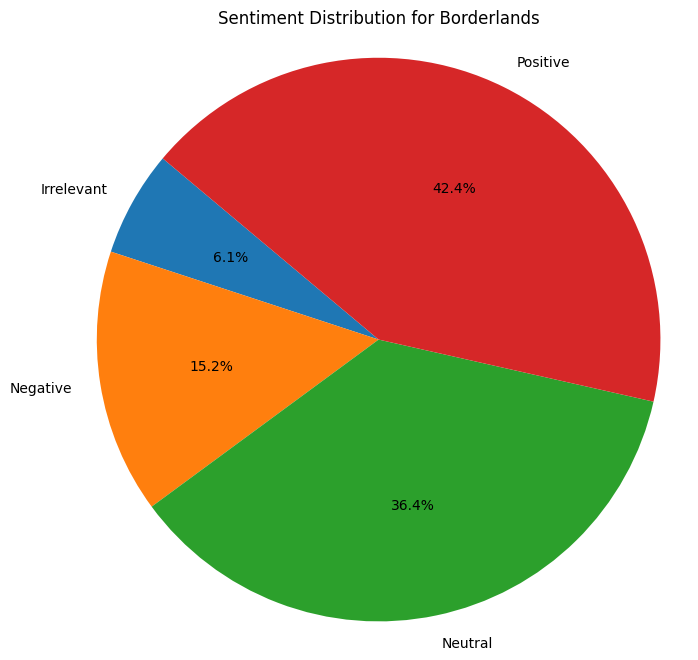

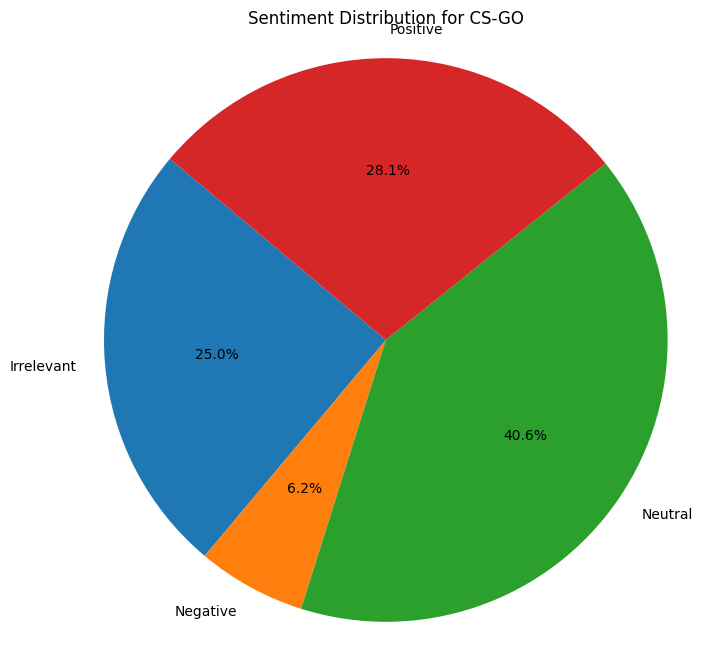

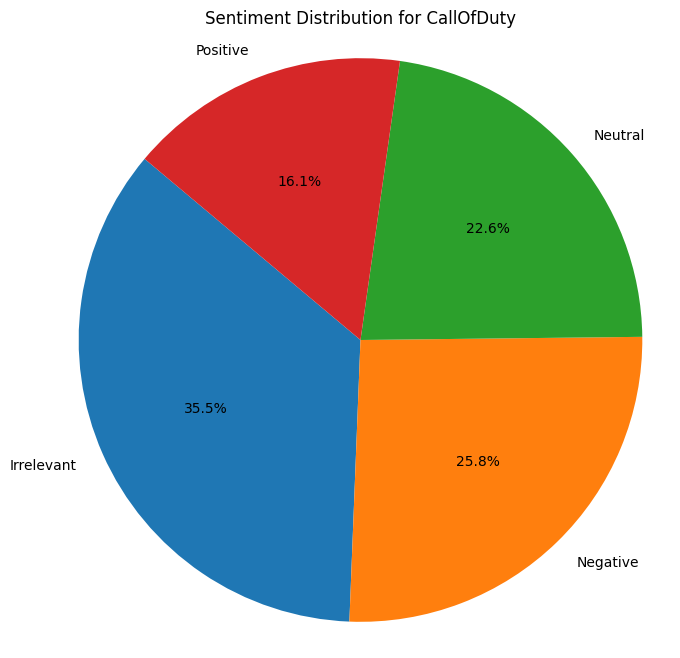

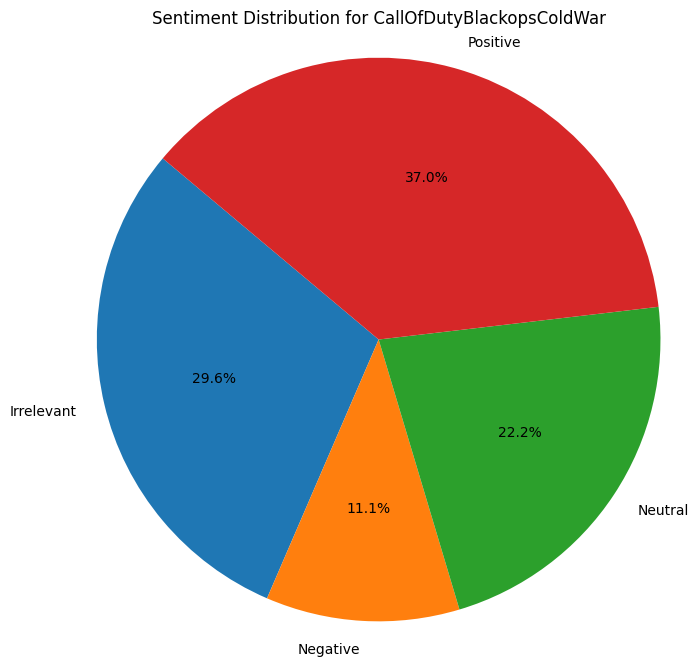

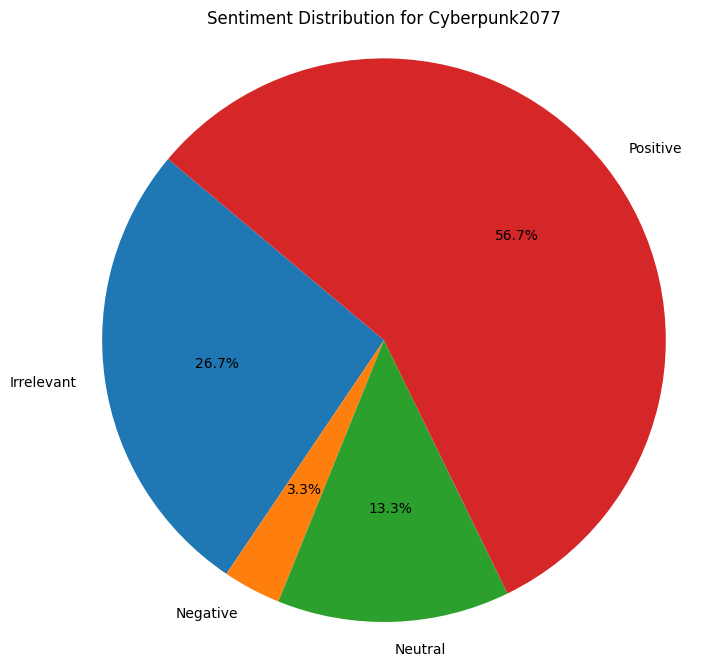

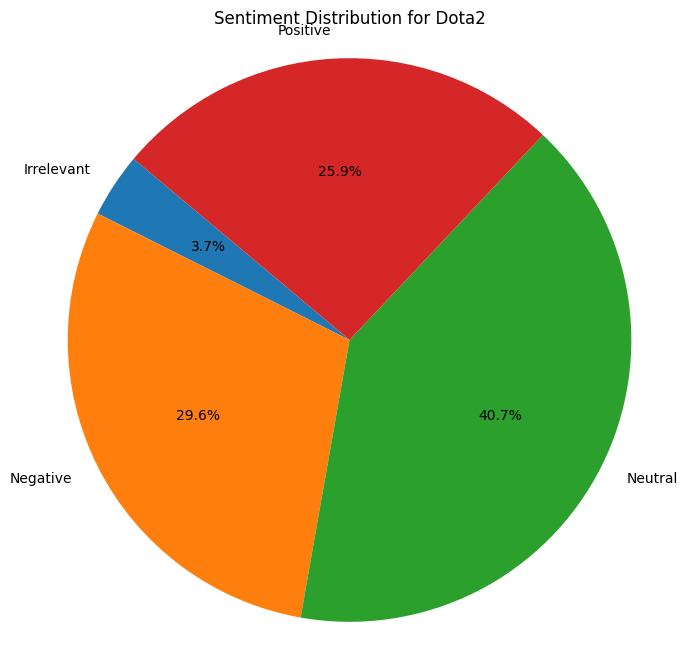

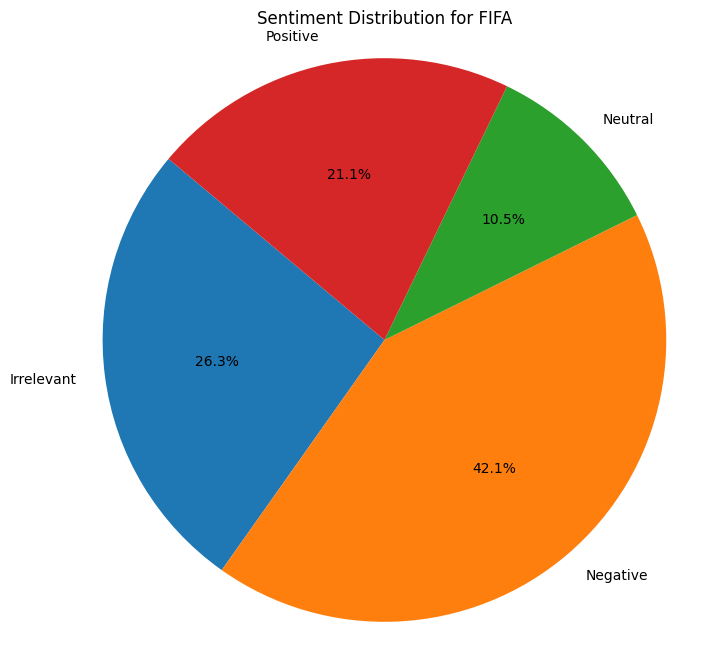

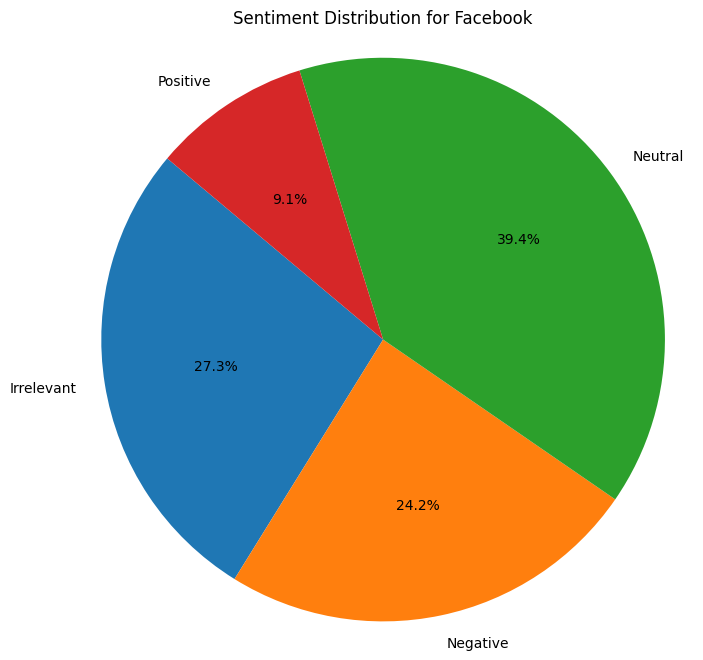

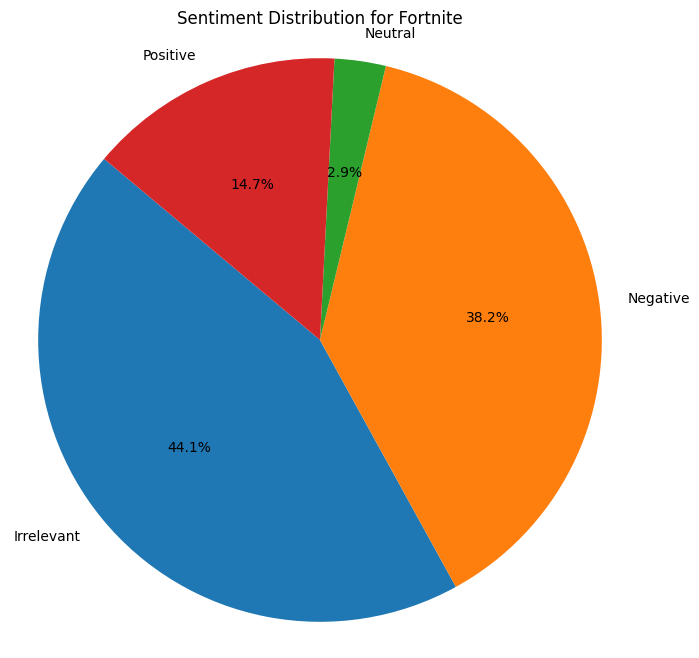

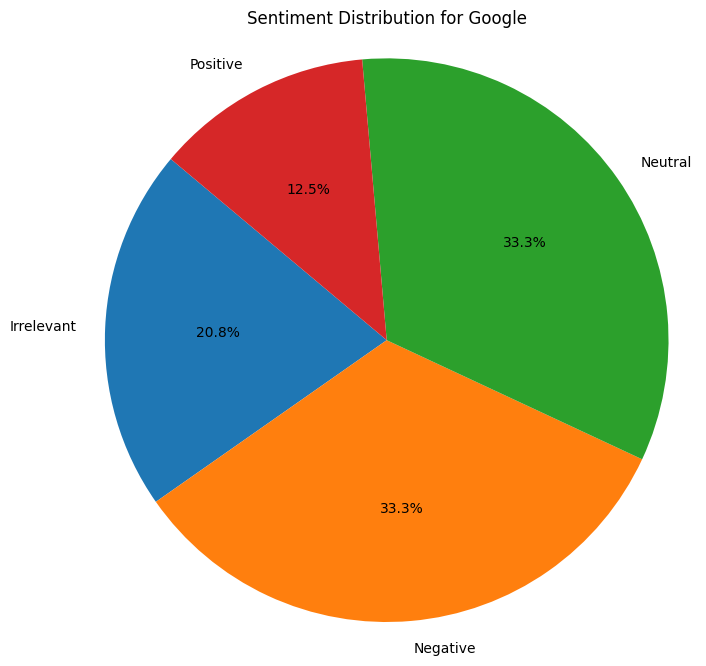

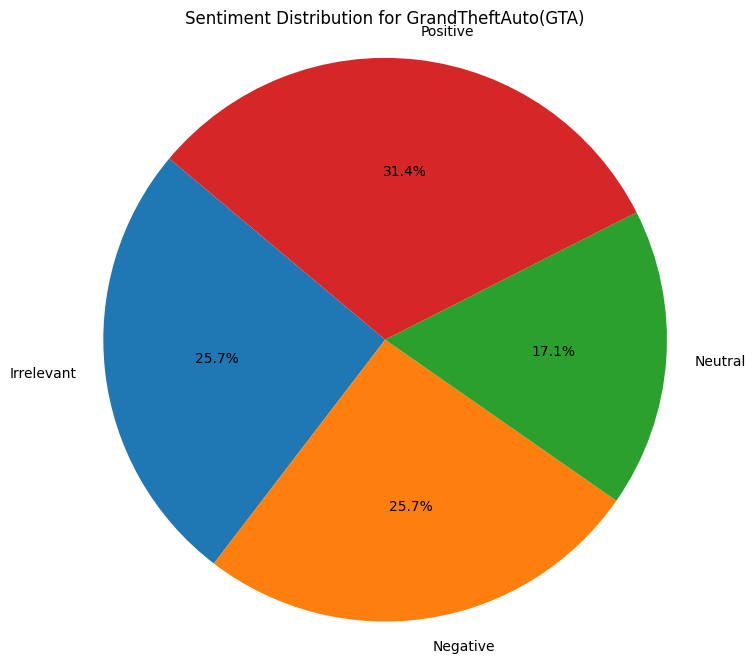

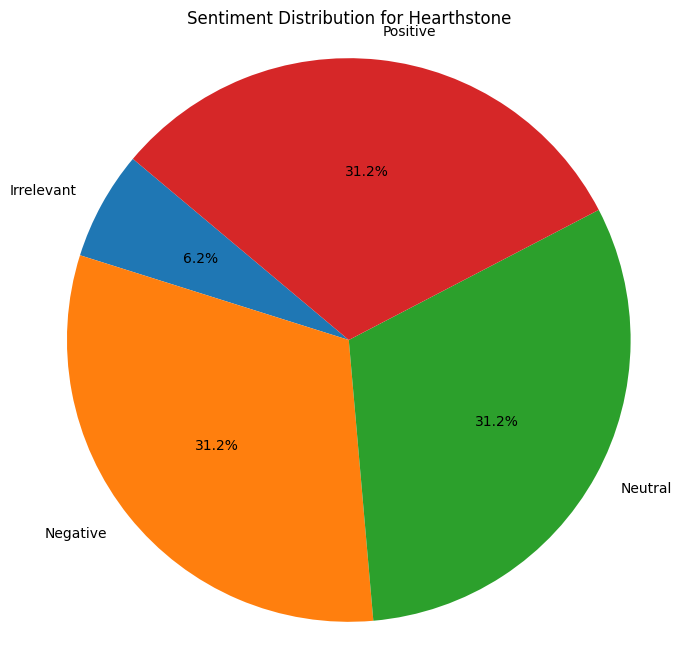

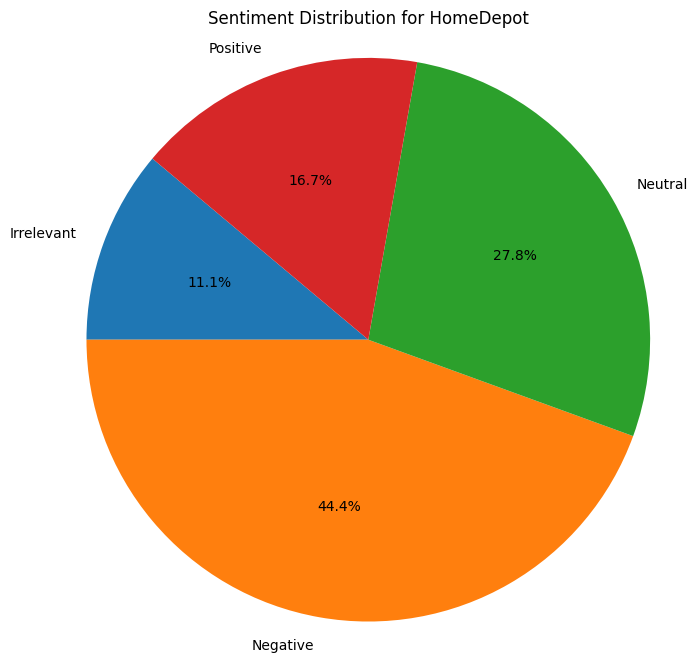

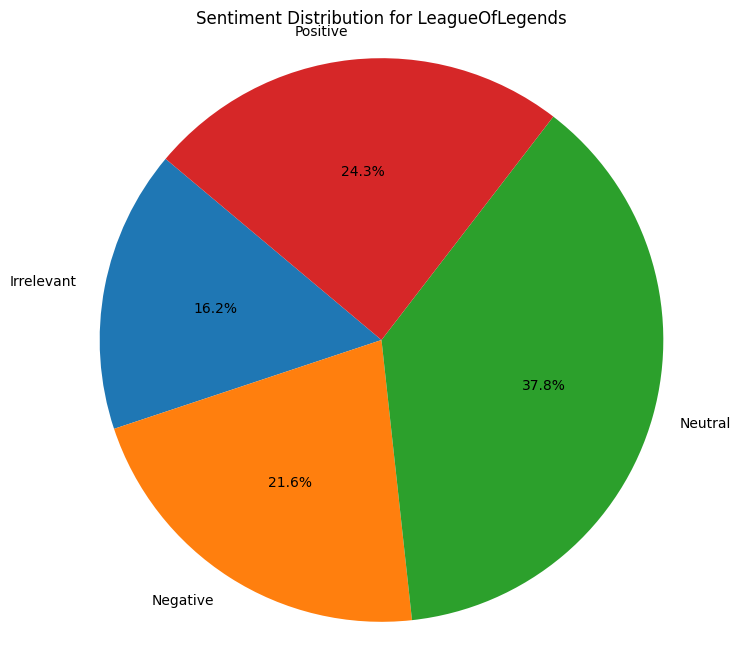

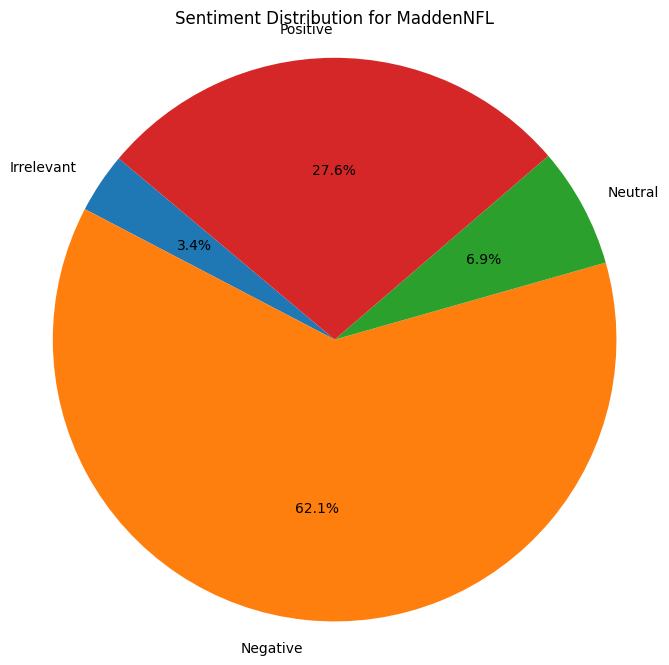

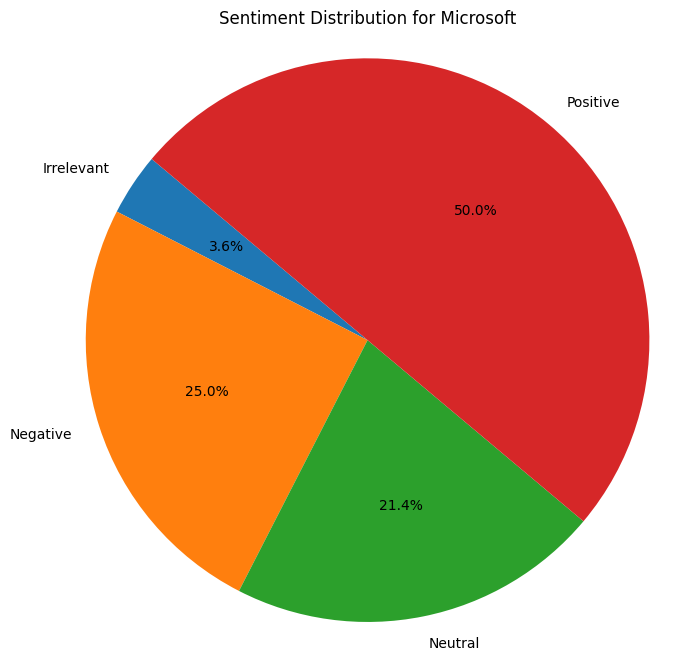

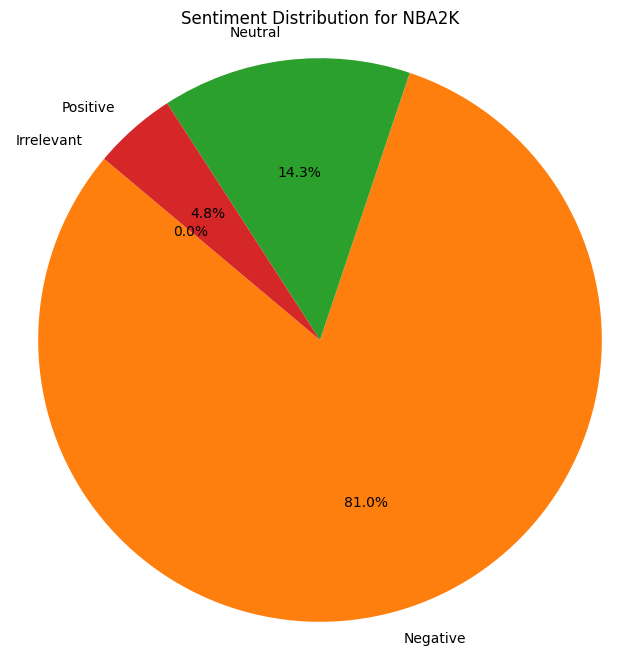

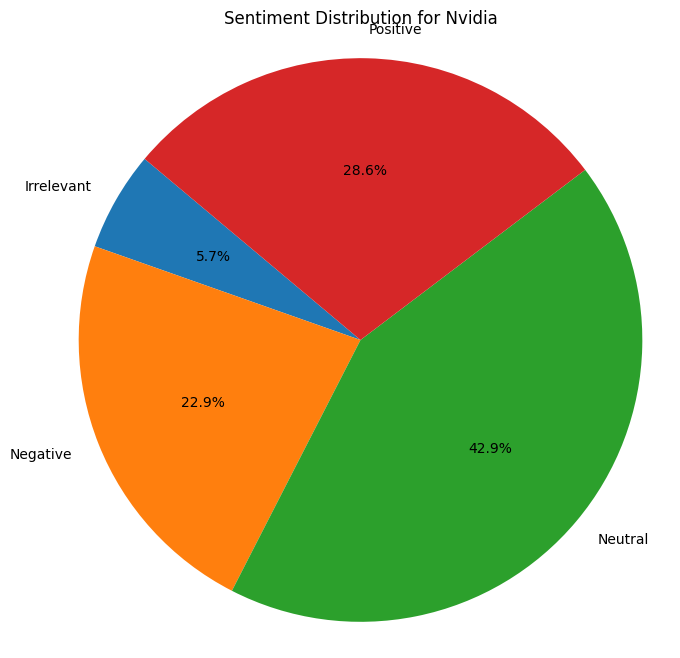

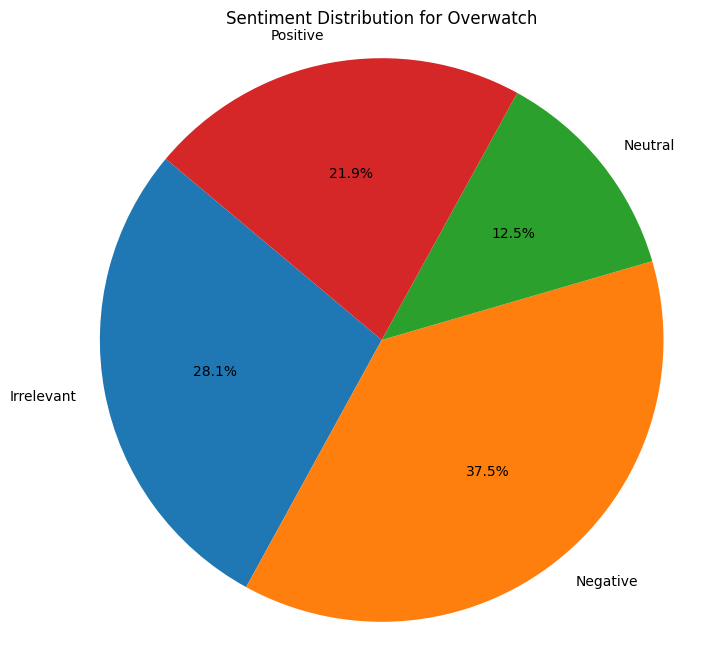

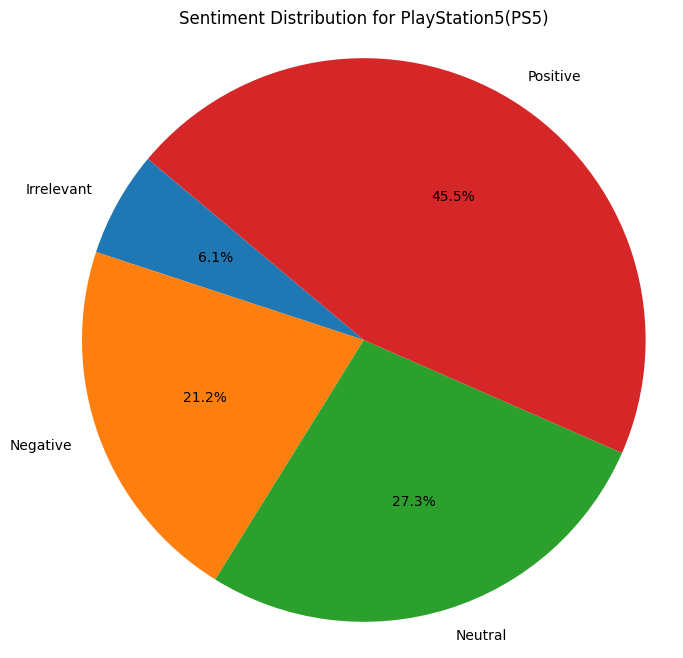

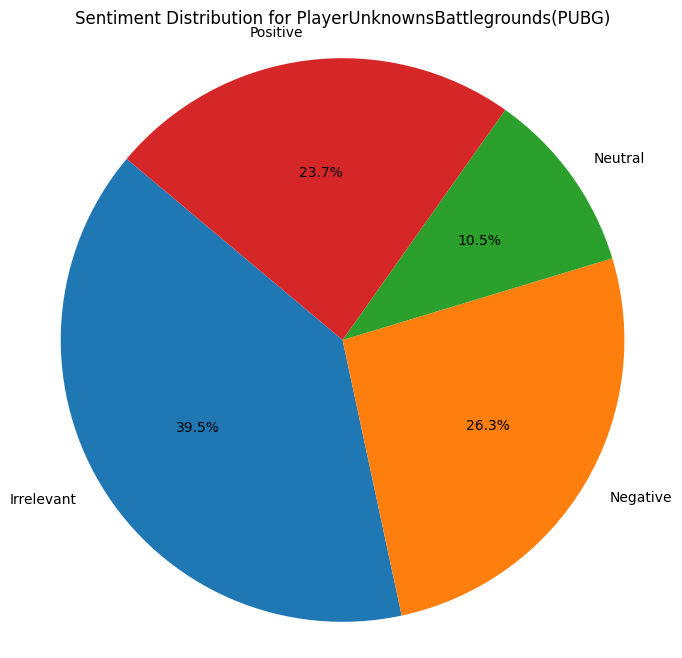

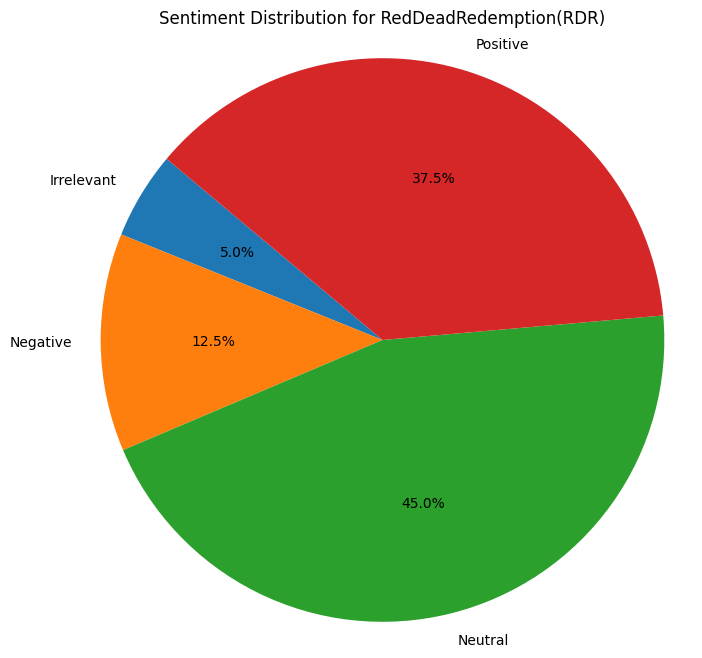

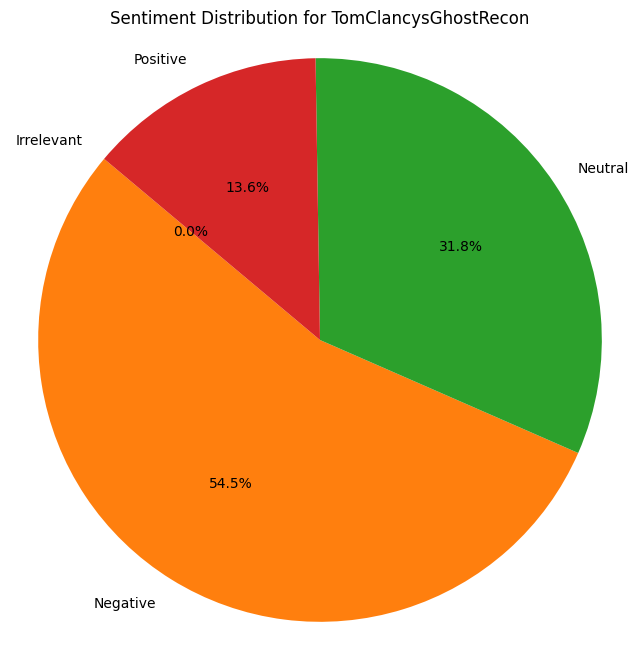

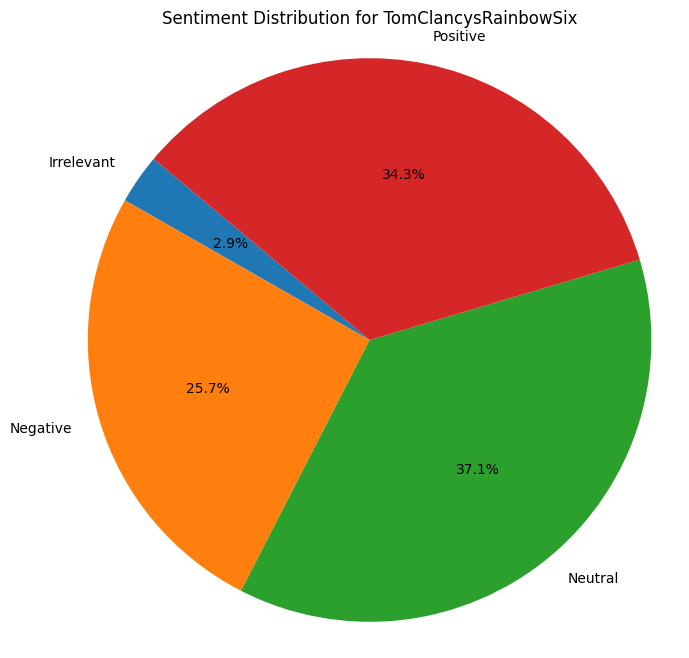

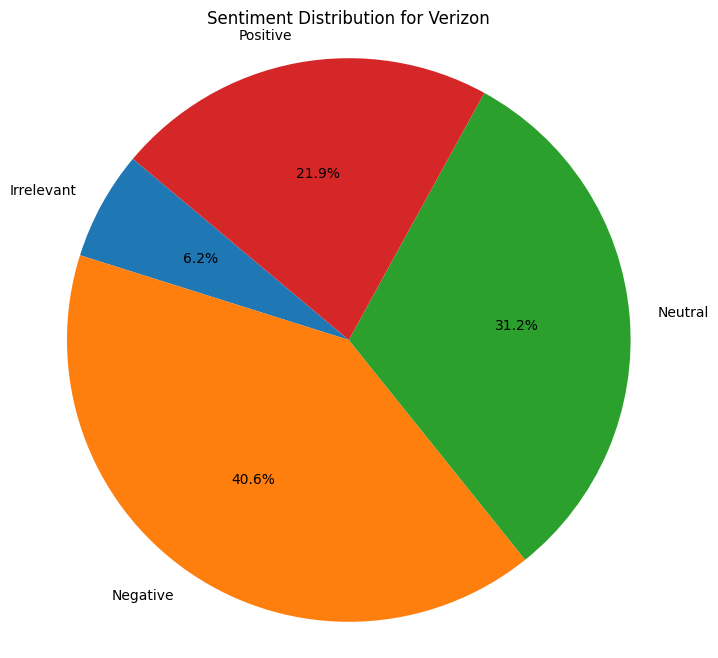

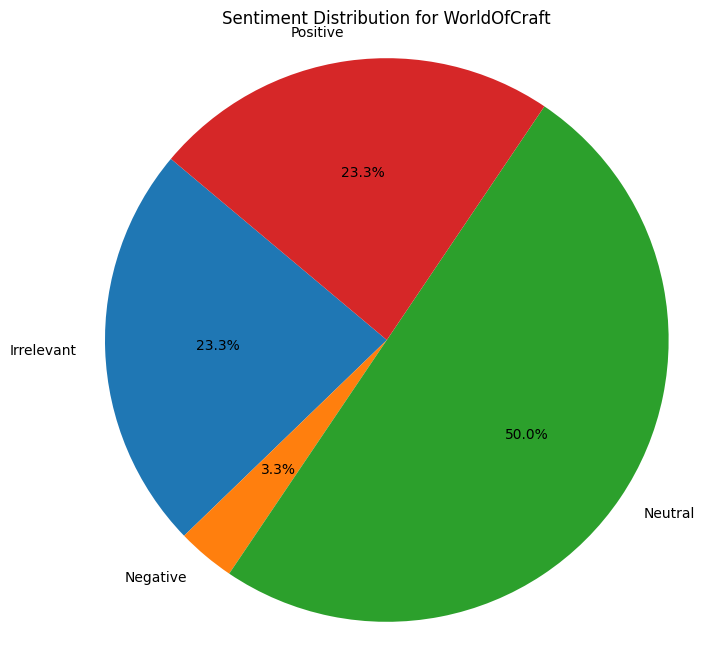

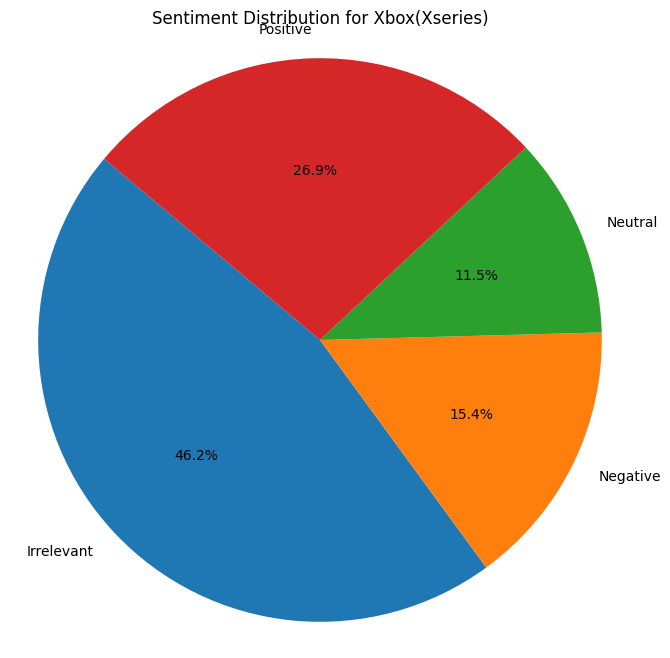

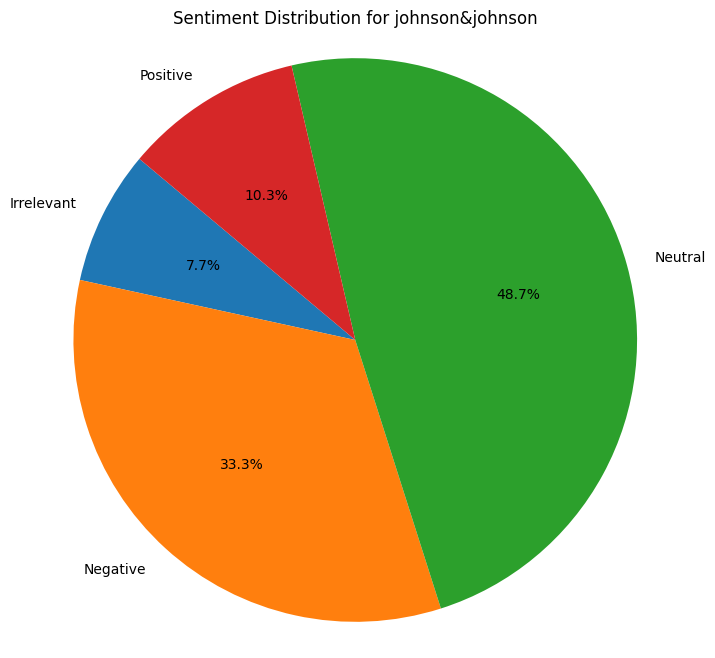

In [11]:
for entity in sentiment_distribution.index:
    plt.figure(figsize=(8, 8))
    plt.pie(sentiment_distribution.loc[entity], labels=sentiment_distribution.columns, autopct='%1.1f%%', startangle=140)
    plt.title(f'Sentiment Distribution for {entity}')
    plt.axis('equal')
    plt.show()


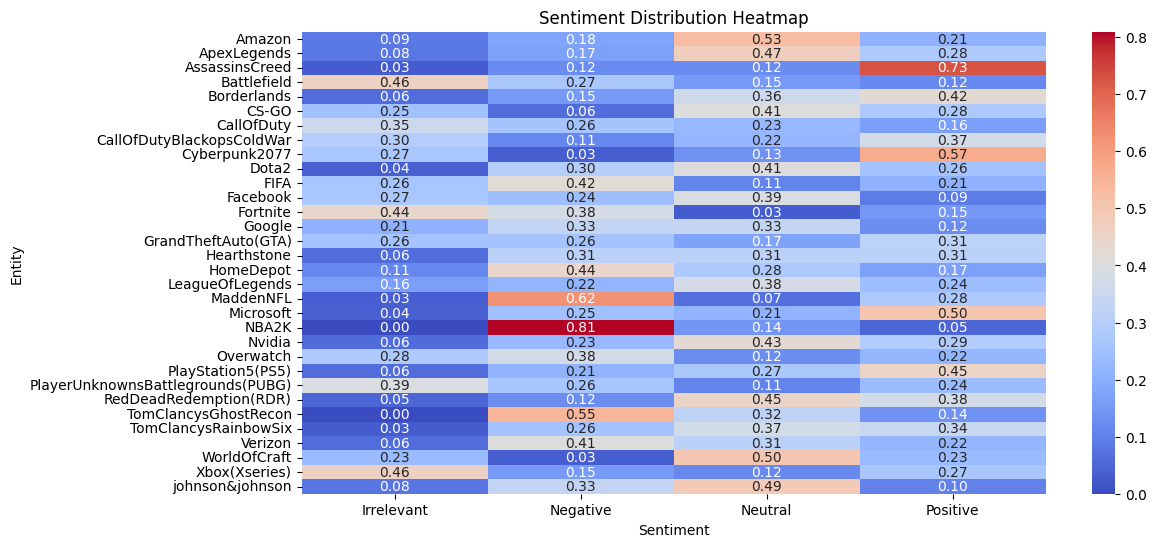

In [13]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.heatmap(sentiment_distribution, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Sentiment Distribution Heatmap')
plt.xlabel('Sentiment')
plt.ylabel('Entity')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

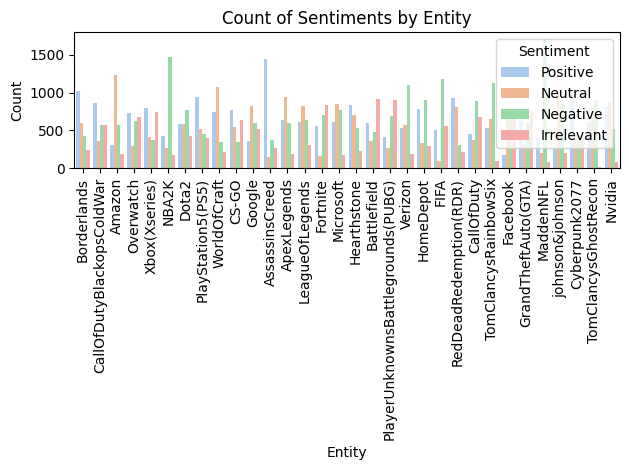

In [15]:

sns.countplot(data=train_data, x='Entity', hue='Sentiment', palette='pastel')
plt.title('Count of Sentiments by Entity')
plt.xlabel('Entity')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()


Entities with the most positive/negative tweets

In [23]:

sentiment_counts = train_data.groupby(['Entity', 'Sentiment']).size().unstack(fill_value=0)
most_positive_entity = sentiment_counts['Positive'].idxmax()
most_positive_count = sentiment_counts['Positive'].max()
most_negative_entity = sentiment_counts['Negative'].idxmax()
most_negative_count = sentiment_counts['Negative'].max()
print(f"Entity with the most positive tweets: {most_positive_entity} ({most_positive_count} tweets)")
print(f"Entity with the most negative tweets: {most_negative_entity} ({most_negative_count} tweets)")


Entity with the most positive tweets: AssassinsCreed (1446 tweets)
Entity with the most negative tweets: MaddenNFL (1710 tweets)


AssassinsCreed is therefore the entity that has received the most positive comments while MaddenNFL has been the one with the most negative ones

World Cloud Visualization

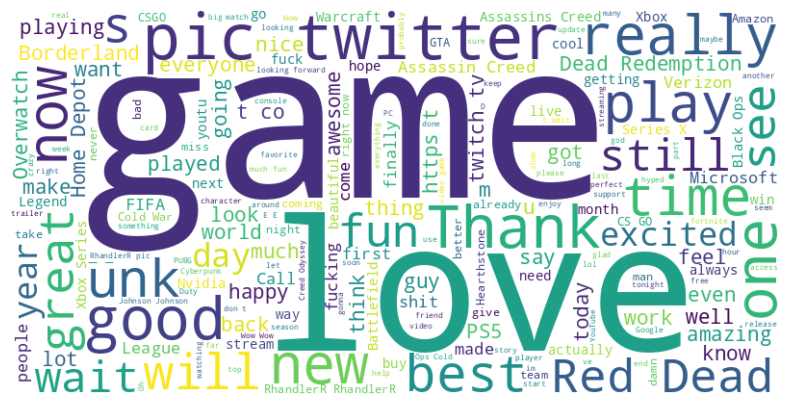

In [18]:
from wordcloud import WordCloud

#replace NaN values with an empty string
train_data['Tweet_Text'] = train_data['Tweet_Text'].fillna('')
positive_text = " ".join(train_data[train_data['Sentiment'] == 'Positive']['Tweet_Text'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



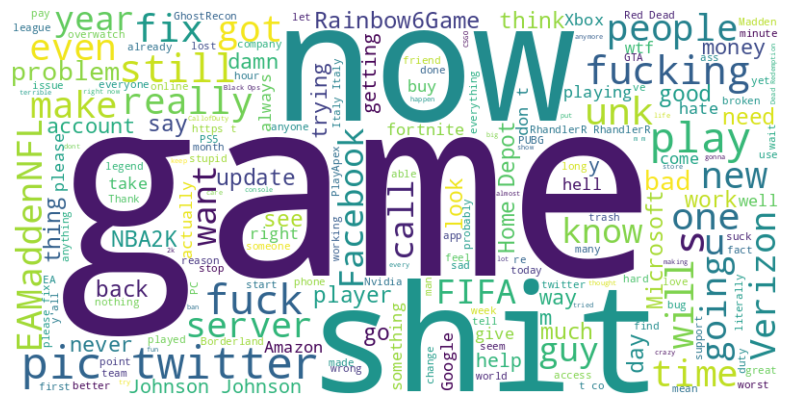

In [19]:

positive_text = " ".join(train_data[train_data['Sentiment'] == 'Negative']['Tweet_Text'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Implementation of NLP for analysis

Text Preprocessing

In [20]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re

nltk.download('stopwords')
nltk.download('punkt')

# initialize stemmer and stopwords
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [21]:
def preprocess_text(text):
    #convert to lowercase
    text = text.lower()

    #remove special characters
    text = re.sub(r"http\S+|www\S+|https\S+|@\S+|#\S+", "", text, flags=re.MULTILINE)
    text = re.sub(r'\W', ' ', text)

    #tokenization
    words = word_tokenize(text)

    #remove stopwords and stem the words
    words = [stemmer.stem(word) for word in words if word not in stop_words]

    return " ".join(words)


train_data['Processed_Tweet_Text'] = train_data['Tweet_Text'].apply(lambda x: preprocess_text(str(x)))
train_data.head()

,ID,Entity,Sentiment,Tweet_Text,Processed_Tweet_Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im get borderland murder
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,come border kill
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im get borderland kill
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im come borderland murder
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im get borderland 2 murder


Topic Modelling using LDA

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


vectorizer = CountVectorizer(max_features=1000, stop_words='english')
tweet_vectors = vectorizer.fit_transform(train_data['Processed_Tweet_Text'])

lda_model = LatentDirichletAllocation(n_components=5, random_state=42)  # 5 topics for example
lda_model.fit(tweet_vectors)

#display the top words in each topic
n_top_words = 10
feature_names = vectorizer.get_feature_names_out()

for topic_idx, topic in enumerate(lda_model.components_):
    print(f"Topic #{topic_idx}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))


Topic #0:
play love game like dead look good tv red twitch
Topic #1:
com pic twitter fuck game rhandlerr facebook fix googl peopl
Topic #2:
game new xbox best good realli great seri nvidia thank
Topic #3:
amazon fifa game play got team win video world watch
Topic #4:
com johnson player ban home pubg 2020 depot microsoft store


Throughout these tweets, the topics that comeback are the ones of gaming, social media, gaming consoles and specific gaming platforms